In [135]:
import qiskit as qk
import tensorflow as tf
import random
from math import pi
from qiskit import(QuantumCircuit,execute,Aer)
from qiskit.visualization import plot_histogram

In [136]:
#Creating qubits
q=qk.QuantumRegister(2)

In [137]:
#Creating Classical Bits

c=qk.ClassicalRegister(2)
circuit=qk.QuantumCircuit(q,c)

In [138]:
#Hadamard Gate on first and second qubit (Outputs both possible states 0 and 1)
#To get all possible input combinations |00>,|01>,|10>,|11>

#circuit.h(q[0])
#circuit.h(q[1])

In [139]:
#Rotation Operation Ry along y-axis on first qubit 
theta=random.vonmisesvariate(mu=0, kappa=4)
circuit.ry(theta,q[0])

In [140]:
#CNOT Gate on the first to the second qubit (Negates second state only if first state is 1)
circuit.cx(0,1)

In [141]:
#Rotation Operation Rx along x-axis on second qubit 
circuit.rx(pi,q[1])

In [144]:
#Display circuit
circuit.draw()

┌────────────┐               
q80_0: ┤ RY(5.7853) ├──■────────────
       └────────────┘┌─┴─┐┌────────┐
q80_1: ──────────────┤ X ├┤ RX(pi) ├
                     └───┘└────────┘
c12: 2/═════════════════════════════

In [143]:
simulator = Aer.get_backend('qasm_simulator')

In [146]:
#Map quantum measurement to classical bits
circuit.measure(q,c)

In [147]:
#Checking for 1 measurements
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'10': 1}


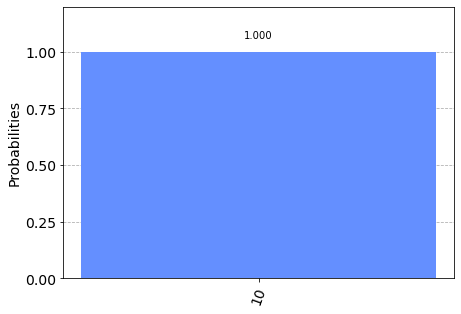

In [148]:
#Histogram of probabilities for 01 and 10 in one measurement
plot_histogram(counts)

In [149]:
#Checking for 10 measurements
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=10)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'01': 2, '10': 8}


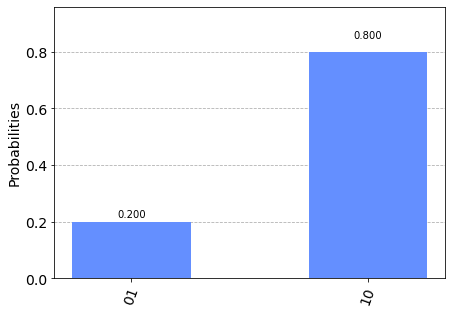

In [150]:
#Histogram of probabilities for 01 and 10 in ten measurements
plot_histogram(counts)

In [151]:
#Checking for 100 measurements
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=100)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'01': 8, '10': 92}


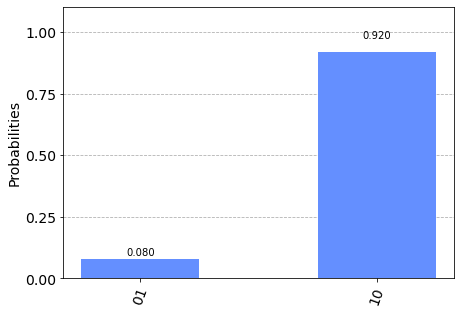

In [152]:
#Histogram of probabilities for 01 and 10 in hundred measurements
plot_histogram(counts)

In [153]:
#Checking for 1000 measurements
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'01': 53, '10': 947}


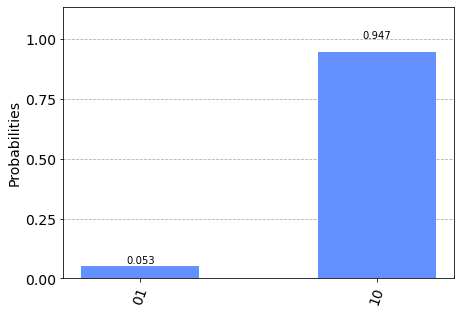

In [154]:
#Histogram of probabilities for 01 and 10 in thousand measurements
plot_histogram(counts)